<center>
<img src="./pictures/ICA.png" style="float:left; max-width: 80px; display: inline" alt="ICA" /></a> 
<a href="https://r3asc18.sciencesconf.org/" ><img src="./pictures/web_R3ASC_20.png" style="max-width: 500px; display: inline"  alt="R3ASC"/></a> 
<img src="./pictures/logo-insa.jpg" style="float:right; max-width: 120px; display: inline" alt="INSA" /></a>
</center>

# Surrogate model of the housing

*Written by Marc Budinger & Christophe Corsi, INSA Toulouse, France*

From a purely mechanical point of view, the design of the EMA housing has to focus on the elementary forces acting on the housing, which can be divided into two categories: the mechanical stresses induced by the power transmission to the load, which are low frequency (static), and the vibratory induced stresses, at high frequency (between 5 Hz and  2000 Hz):
-	Static load sizing generated by:  
    - Tensile/compressive/buckling forces that are transmitted through the rod to the nut and the screw, then to the thrust bearing and finally to the housing. The high number of cycles generally requires the fatigue limits of materials to be taken into account.
    - Shearing and bending stresses that are due to the masses of components and friction torques in spherical bearings or anchorage points.
    - Torsion stresses induced by friction and reaction torques of motor / reducers / nut screw. 
-	Dynamic stress sizing generated by:
    - Transversal vibrations due to the vibratory environment which can generate important mechanical bending stresses.
    - Transient rotational, longitudinal and transversal loads (e.g. at stop-end).
The tensile/compressive/buckling stress is the most significant static load that the actuator receives. Other static loads are often considered as unimportant and stemming from parasitic efforts. The path of the various static or dynamic loads is represented for a generic actuator on the following figure. 

![Mechanical Loads](./pictures/HousingLoads.png)

For me details on EMA housing sizing see:
> Hospital, Fabien; Budinger, Marc; Reysset, Aurélien; Maré, Jean-Charles ,Preliminary design of aerospace linear actuator housings, Aircraft Engineering and Aerospace Technology: An International Journal,87,3,224-237, 2015, Emerald Group Publishing Limited

As vibration are very important for space embeeded actuator, we will developp here a simplify model for the predesign of long linear actuator under vibratory loads. We will use surrogate models technics and especially the one proposed in the following paper:
> Sanchez, Florian; Budinger, Marc; Hazyuk, Ion; Dimensional analysis and surrogate models for the thermal modeling of Multiphysics systems, Applied Thermal Engineering,110,758-771, 2017, Elsevier





### FEM modal analysis and stress evaluation

We will analyze the vibratory loading problem using the following simplified geometry: 
- 2 hollow cylinders for the housing 
- a full cylinder for the nut.   

The effect of the reported weight of the screw is neglected. The connection between the different part of the housing is assumed to be perfect. The cylinder representing the nut is modeled using a low Young's modulus (1/10 of steel) so as to not help to stiffen the structure.  

A FEM modal analysis is realized and enable to get: 
- the resonance frequency $f_r$ or the resonance angular frequency $\omega_r$
- the modal form characterised by a maximal displacement $U_0$ 
- the corresponding maximum stress $\sigma_0$. The maximum stress is on the tube of $e_1$ thickness.  

Maximum stress is linearly linked to displacement:  
$ \sigma = k_\sigma.U$ where $k_\sigma = \frac{\sigma_0}{U_0}$

The maximal displacement at resonance can be approximated by the following relationship:  
$U = \frac{F}{C_{eq}.\omega_r}=\frac{Q_m.k_{acc}.M_{eq}.a}{K_{eq}}=\frac{k_{acc}.Q_m.a}{\omega_r^2}$  
where $a$ is the vibratory sinusoidal acceleration and $Q_m$ the mechanical quality coefficient.

![Mechanical Loads](./pictures/ModalAnalysis.png)

*Remark*: The equivalent force F of acceleration effect can be evaluated thanks an equivalent work  
$F.U=\iiint_V u(x,t)a(t)\rho \,dv$ thus $F(t)=M_{acc}.a(t)$ with $M_{acc}=\frac{\iiint_V u(x,t)\rho \,dv}{U}$  
The mass subjected to the acceleration ($M_{acc}$) is not identical to that expressing the kinetic energy ($M_{eq}$):  
$M_{eq}=\frac{\iiint_V u(x,t)^2a(t)}{U^2}$  
In previous equation:  
$k_{acc}=\frac{M_{acc}}{M_{eq}}$  


### Dimensional analysis

The use of the [Buckingham Theorem](https://en.wikipedia.org/wiki/Buckingham_%CF%80_theorem) and dimensional analysis enables to reduce the number of variables to manipulate to express a physical problem.  

For our example, the link between stress and displacement is function of:  
$ \frac{\sigma}{U} = k_\sigma = f(E,d,L_a,e_1,e_2,L_{rs})$   
which can be rewritten with the following dimensionless numbers:  
$ \pi_{\sigma_U} = \frac{\sigma.d}{U.E} = f(\frac{L_a}{d},\frac{e_1}{d},\frac{e_2}{d},\frac{L_{rs}}{d})$   

For the angular pulsation:  
$ \omega_r = g(E,\rho,d,L_a,e_1,e_2,L_{rs})$  
which can be rewritten with the following dimensionless numbers:  
$ \pi_{\omega_r} = \omega_r.\sqrt{\rho/E}.d = g(\frac{L_a}{d},\frac{e_1}{d},\frac{e_2}{d},\frac{L_{rs}}{d})$   

Thus the stress at resonance frequency under a vibratory load is:

$\sigma = k_\sigma.U = k_\sigma.\frac{Q_m.a}{\omega_r^2}=
\frac{E.Q_m.a.d^2.\rho}{d.E}\frac{f(\frac{L_a}{d},\frac{e_1}{d},\frac{e_2}{d},\frac{L_{rs}}{d})}
{{g(\frac{L_a}{d},\frac{e_1}{d},\frac{e_2}{d},\frac{L_{rs}}{d})}^2}=Q_mad\rho.h(\frac{L_a}{d},\frac{e_1}{d},\frac{e_2}{d},\frac{L_{rs}}{d})$  

or  

$\pi_0=\frac{\sigma}{Q_mad\rho}=h(\frac{L_a}{d},\frac{e_1}{d},\frac{e_2}{d},\frac{L_{rs}}{d})$  

The expression of the stress is thus only function of 4 aspect ratios. One of this aspect ratio, $\frac{L_{rs}}{d}$, can be assumed to be constant because of geometrical similarity on roller screw components.


### Design of experiments and data regression



Once the dimensionless quantities are defined, a design of experiments (DoE) is realized with $e_1$, $e_2$, $d$ and $L_a$. The simulations (modal analysis) is carried out using a software of computation by finite elements which finally allows to generate the variable of interest :
$ \ Pi_0 = \ frac {\ sigma} {Q_mad \ rho} $
Here we will retrieve the characteristic quantities of the problem in the form of a .csv file presenting 4 columns:
- the 1st column for the dependent variable $\Pi_0$ 
- 3 other columns that correspond to $L_a/d$, $e_1/d$ and $e_2/d$ the independent quantities of the problem


In [6]:
# Reading the CSV FILE
import pandas as pd
FILENAME = "dataPI0_carter.csv"
dataset = pd.read_csv(FILENAME, sep=';') # setting the separator as ";"

# Print the header (first lines) of the dataset
dataset.head()

,PI0,e1/d,e2/d,La/d
0,256.19,10.526316,0.052632,0.052632
1,302.56,11.842105,0.052632,0.052632
2,351.23,13.157895,0.052632,0.052632
3,403.72,14.473684,0.052632,0.052632
4,460.11,15.789474,0.052632,0.052632


The dependant variable will be approximated here with a linear regression (Response Surface Model or RSM) with a developpment taken into account order 1 (main effect), interactions and order 2 effects which would give the following form: 

$\pi_0 = a_0 + \sum\limits a_i\pi_i + \sum\limits a_{ij}\pi_{i}\pi_{j} + \sum\limits a_{ii}\pi_i^2$  

A log transformation on variables is also taken into account which gives the form:  

$log(\pi_0) = a_0 + \sum\limits a_i\pi_i + \sum\limits a_{ij}log(\pi_{i})log(\pi_{j}) + \sum\limits a_{ii}log(\pi_i^2)$  

which can be rewritten as:  

$\pi_0 = 10^{a_0}\prod\limits_{i=1}^{n} \pi_i^{a_i + a_{ii}log(\pi_{i}) + \sum\limits_{j=i+1}^{n} a_{ij}log(\pi_{j})} $  

This variable power law form enables to deal with large variation range of dependant and independant variables. 


In [15]:
# by Christophe CORSI
# =============================
# Generate Y and X data with a log transformation
# =============================

# Extracting pi_0 as dependant value with the iloc and the .values methods
# We also reshape the vector to have a column matrix with the reshape method; giving -1 as the number of lines
# (which means as many as needed) and 1 as the number of columns. It's important because a vector is not handled as 
# a matrix, and we need a matrix for further operations.
y = dataset.iloc[:,0].values.reshape(-1,1)

# Same for x (independant variables)
# dataset.iloc[alllines, [2nd,3rd and 4th column]]
# No need to reshape it because as it's not a vector, it will be casted as a matrix.
x = dataset.iloc[:,[1,2,3]].values # La/d ; e1/d and e2/d

# Transforming the values to the logarithmic scale
import numpy as np
x_log = np.log10(x)
y_log = np.log10(y)

# Building the train and test split set (to avoid overfitting)
# set SPLIT to False if you do not want to do this.
SPLIT = True
if SPLIT:
    # If we want to split
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x_log,y_log, test_size = 0.2) #20% of samples used for test
    
else:
    # If we dont want to split
    x_train = x_log
    x_test = x_log
    y_train = x_log
    y_test = y_log

# =============================
# Building the regression matrix X (order 2)
# =============================
    
# This is equivalent to the following matrix:
# x1_1 ; x2_1 ; x3_1 ; x1_1² ; x2_1² ; x3_1² ; x1_1*x2_1  ...
# x1_2 ; x2_2 ; x3_2 ; x1_2² ; x2_2² ; x3_2² ; x1_2*x2_2  ...
# x1_2 ; x2_3 ; x3_3 ; x1_3² ; x2_3² ; x3_3² ; x1_3*x2_3  ...
# x1_3 ; x2_4 ; x3_4 ; x1_4² ; x2_4² ; x3_4² ; x1_4*x2_4  ...
# ....
# Warning : The intercept term (1 column) or "bias term" is not included because it's already included in the linear regressor
# We could put it there but we would have to set the fit_intercept of the regressor to False

#It's done with the following library
from sklearn.preprocessing import PolynomialFeatures
DEGREE = 2 # DEGREE OF THE REGRESSION

# Include bias is FALSE because the linear regression already uses it
poly_feature = PolynomialFeatures(degree=DEGREE, include_bias = False) 
# Applying this object to our data
x_train_polynomial = poly_feature.fit_transform(x_train)

# Also applying this to the test set for further prediction
x_test_polynomial = poly_feature.transform(x_test)

# Here we will fit the model
# Importing the involved library
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True, n_jobs=-1) # We include the bias here
# n_jobs = -1 to use all the available computation power. Use 1 to use a single core if issues are encoutered.

# =============================
# Fitting the model to our data
# =============================
regressor.fit(x_train_polynomial, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

Once the regression realized, we can print the coefficients or generate the expression of the surrogate:

In [40]:
# by Christophe CORSI
# =============================
# Getting the coefficients
# =============================
term_names = poly_feature.get_feature_names()
coefficients = regressor.coef_.flatten() # to get a list, because it was a matrix for manipulation.
intercept = regressor.intercept_.flatten()

# =========================
# POST PROCESSING
# =========================
from fractions import Fraction

expression = ""
print("Coefficients in the logarithmic scale")
for index_of_term, term in enumerate(term_names):
    print("Coefficient in front of {name} : {value}".format(name=term, value = coefficients[index_of_term]))
    

print("Interception term : {value}".format(value = intercept[0]))
print(term_names)


# =======================
# GENERATE THE EXPRESSION
# =======================
expression = None
for index_of_term, term in enumerate(term_names):
    term = term.replace("x0","log10(L/d)")
    term = term.replace("x1","log10(e1/d)")
    term = term.replace("x2","log10(e2/d)")
    term = term.replace("^","**")
    term = term.replace(" ","*")
         
    term_with_value = str((Fraction(coefficients[index_of_term]).limit_denominator(1000))) + "*" + term 
    
    
    if expression is None :
        # First iteration, so we build the expression
        expression = sp.sympify(term_with_value)
    else:
        # For the other iterations we just add the term
        expression = expression + sp.sympify( term_with_value )
# We now add the intercept
expression = expression + sp.sympify(str((Fraction(intercept[0]).limit_denominator(1000))))

# Passing out of the log scale
expression = 10**expression

print(expression)

Coefficients in the logarithmic scale
Coefficient in front of x0 : 0.8780782721398129
Coefficient in front of x1 : -0.5907935696564166
Coefficient in front of x2 : 0.804572569330347
Coefficient in front of x0^2 : 0.3839007207563109
Coefficient in front of x0 x1 : 0.086956217945965
Coefficient in front of x0 x2 : 0.07363579654985675
Coefficient in front of x1^2 : 0.14013165757556645
Coefficient in front of x1 x2 : -0.2129562593961552
Coefficient in front of x2^2 : 0.2708348858632216
Interception term : 1.2554109036368244
['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']
10**(124*log10(L/d)**2/323 + 2*log10(L/d)*log10(e1/d)/23 + 31*log10(L/d)*log10(e2/d)/421 + 713*log10(L/d)/812 + 125*log10(e1/d)**2/892 - 194*log10(e1/d)*log10(e2/d)/911 - 231*log10(e1/d)/391 + 13*log10(e2/d)**2/48 + 704*log10(e2/d)/875 + 290/231)


Here we define a function which realize numerical evaluation of the previous regression. 

In [9]:
# =========================
# INTERFACING
# =========================
def vplm(x:np.array)->np.array:
    """
    Give here the x vector as an array to be evaluated.
    
    Arguments:
        x {np.array} -- One line per experience (can be unique) and one parameter per column
    Returns:
        y {np.array} -- Vector of the predicted output
    """
    x = np.log10(x)
    # Include bias is FALSE because the linear regression already uses it
    #poly_feature = PolynomialFeatures(degree=DEGREE, include_bias = False) 
    # Applying this object to our data
    X = poly_feature.fit_transform(x)
    
    return 10**(regressor.predict(X))

### Validation
A way to check the quality of the function is to compare the $\pi_0$ data resulting from FEM simulation to the evaluation of the surrogate model. A perfect surrogate model will look like a $y=x$ curve (black line).
The set of data has been previoulsy split into 2 sets : one for training (blue) and one for testing (red). A good surrogate model should maintain prediction quality for the both sets.    

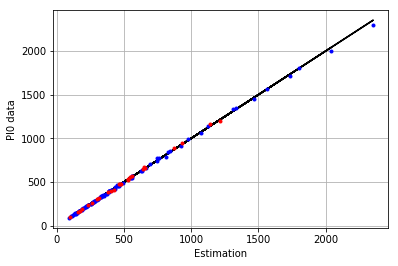

In [10]:
import matplotlib.pyplot as plt

# plot
g, ax = plt.subplots(1,1,sharex=True)
ax.plot(10**y_train,10**y_train,'k',10**y_train, 10**regressor.predict(x_train_polynomial), '.b',
        10**y_test, 10**regressor.predict(x_test_polynomial), '.r')
ax.set_ylabel('PI0 data')
ax.set_xlabel('Estimation')
ax.grid()

### Use of the surrogate model

We illustrate here the use of the surrogate model for a numerical example:

In [47]:
from numpy import log10

d = 0.09    # diameter
L = .9     # length
e1 = 0.01   # Tube thickness
e2 = 0.005   # Housing thickness

Qm=30       # Mechanical quality coef
rho=7800    # Volumic mass
acc=20*9.8  # Acceleration


PI0_function =  vplm([[L/d,e1/d,e2/d]])
sigma_function = PI0_function*Qm*d*rho*acc
PI0_expression = 10**(124*log10(L/d)**2/323 + 2*log10(L/d)*log10(e1/d)/23 + 31*log10(L/d)*log10(e2/d)/421 + 
                      713*log10(L/d)/812 + 125*log10(e1/d)**2/892 - 194*log10(e1/d)*log10(e2/d)/911 - 
                      231*log10(e1/d)/391 + 13*log10(e2/d)**2/48 + 704*log10(e2/d)/875 + 290/231)
sigma_expression = PI0_expression*Qm*d*rho*acc

print("Max stress with python function: %.0f MPa"%(sigma_function/1e6))
print("Max stress with expression: %.0f MPa"%(sigma_expression/1e6))

Max stress with python function: 647 MPa
Max stress with expression: 647 MPa
